In [1]:
# importing tools 
import s3fs
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt 
import cmocean
import math
from matplotlib.patches import Ellipse
import gsw
#for removing warnings
import warnings

# Mooring data

In [2]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
#data_path2 = 's3://data/vel_dataIII.zarr/vel_dataIII.zarr'
data_path1 = 's3://velocity-u.zarr'
data_path2 = 's3://velocity-v.zarr'
data_path3 = 's3://data/CREG12.L75-REF08_mesh_zgr.zarr'
data_path4 = 's3://data/modmoor_varianceII.zarr'

remote_files1 = fsg.glob(data_path1)
remote_files2 = fsg.glob(data_path2)
remote_files3 = fsg.glob(data_path3)
remote_files4 = fsg.glob(data_path4)

store1 = s3fs.S3Map(root=data_path1, s3=fsg, check=False)
store2 = s3fs.S3Map(root=data_path2, s3=fsg, check=False)
store3 = s3fs.S3Map(root=data_path3, s3=fsg, check=False)
store4 = s3fs.S3Map(root=data_path4, s3=fsg, check=False)

du = xr.open_zarr(store=store1, consolidated=True)
dv = xr.open_zarr(store=store2, consolidated=True)
dzz = xr.open_zarr(store=store3, consolidated=True)
dvv = xr.open_zarr(store=store4, consolidated=True)

In [3]:
bathym = dzz.mbathy.isel(x=slice(200,1400),y=slice(650,1800)).squeeze(axis=0)

In [4]:
def open_s3fs(path):
    # open the data with s3fs from the databucket 
    fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
    data_path = f's3://data/{path}'
    remote_files = fsg.glob(data_path)
    fileset = [fsg.open(file) for file in remote_files]
    #open the dataset 
    dset = xr.open_mfdataset(fileset, 
                             #combine='by_coords',
                             compat='override')
    return dset

In [5]:
d15 = open_s3fs('mooring_barents/A-TWAIN_2015-2017_AT200-3_22-118m_ACDP_16640.nc')
d13 = open_s3fs('mooring_barents/A-TWAIN_2013-2015_AT200-2_14-121m_ACDP_16640.nc')
d17 = open_s3fs('mooring_barents/A-TWAIN_2017-2019_AT200-4_20-167m_ACDP_16640.nc')

y1 = open_s3fs('mooring_yermark/Y1.nc') # have information on temp and salinity 
y2 = open_s3fs('mooring_yermark/Y2.nc')
y3 = open_s3fs('mooring_yermark/Y3.nc')

MB = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MB.nc') # have information on temp and salinity 
MW = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MW.nc')
MN = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MN.nc')
MS = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MS.nc')

ANO18 = open_s3fs('moorings_/AON_Sig_ADCP_BS3_2016_2018.nc')
ANO16 = open_s3fs('moorings_/AON_LR_ADCP_BS3_2014_2016.nc')
ANO14 = open_s3fs('moorings_/AON_LR_ADCP_BS3_2013_2014.nc')

E3 = open_s3fs('mooring_nord_svalbard/NL_E3.nc') # have information on temp and salinity 
W3 = open_s3fs('mooring_nord_svalbard/NL_W3.nc')
E2 = open_s3fs('mooring_nord_svalbard/NL_E2.nc') 
W2 = open_s3fs('mooring_nord_svalbard/NL_W2.nc')
E1 = open_s3fs('mooring_nord_svalbard/NL_E1.nc') 
W1 = open_s3fs('mooring_nord_svalbard/NL_W1.nc') 

grid = open_s3fs('smooth_grid_karen.nc')

In [6]:
p_list = [(31.13247,81.24202),
          (31.13533,81.24255),
          (31.14506,81.24587)
          ,(011.1189, 69.5289),
          (013.16845,68.58759),
          (013.19866,68.56109),
          (012.45082,68.50128),
          (5.48733,80.03876),
          (5.56333,79.44093),
          (24.00000,81.24925),
          (18.29052,81.10979),
          (23.59853,81.30813),
          (18.23789,81.22686),
          (23.59982,81.35453),
          (18.23730,81.27356)]

In [7]:
def mean_DEPTH(variabel):
    mean_ = np.zeros(len(variabel.DEPTH))
    for i in range(len(variabel.DEPTH)):
        u = variabel.isel(DEPTH=i)
        nu = np.isnan(u)
        u_ = u[~nu]        
        mean_[i] = np.mean(u_.values)
    return mean_

In [8]:
warnings.simplefilter("ignore")
y1_s = mean_DEPTH(y1.PSAL)
y1_t = mean_DEPTH(y1.TEMP)
y1_p = y1.PRES

y2_s = mean_DEPTH(y2.PSAL)
y2_t = mean_DEPTH(y2.TEMP)
y2_p = y2.PRES

y3_s = mean_DEPTH(y3.PSAL)
y3_t = mean_DEPTH(y3.TEMP)
y3_p = y3.PRES

MB_s = mean_DEPTH(MB.PSAL)
MB_t = mean_DEPTH(MB.TEMP)
MB_p = MB.PRES_ins

MW_s = mean_DEPTH(MW.PSAL)
MW_t = mean_DEPTH(MW.TEMP)
MW_p = MW.PRES_ins

MN_s = mean_DEPTH(MN.PSAL)
MN_t = mean_DEPTH(MN.TEMP)
MN_p = MN.PRES_ins

#MS_s = MS.PSAL

E3_s = mean_DEPTH(E3.PSAL)
E3_t = mean_DEPTH(E3.TEMP)
E3_p = E3.PRES_ins

W3_s = mean_DEPTH(W3.PSAL)
W3_t = mean_DEPTH(W3.TEMP)
W3_p = W3.PRES_ins

E2_s = mean_DEPTH(E2.PSAL)
E2_t = mean_DEPTH(E2.TEMP)
E2_p = E2.PRES_ins

W2_s = mean_DEPTH(W2.PSAL)
W2_t = mean_DEPTH(W2.TEMP)
W2_p = W2.PRES_ins

E1_s = mean_DEPTH(E1.PSAL)
E1_t = mean_DEPTH(E1.TEMP)
E1_p = E1.PRES_ins
#W1_s = W1.PSAL

In [ ]:
gsw.density.rho(SA, CT, p)

In [ ]:
p = gsw.p_from_z(depth,lat) #depth må være positiv oppover, løses med *(-1)

In [9]:
y1_s

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan, 35.06283882, 35.06453851, 35.06626493,
       35.06792084, 35.06958363, 35.07129692, 35.07295816, 35.07456122,
       35.07619029, 35.07781591, 35.07917468, 35.08030057, 35.08140493,
       35.08247709, 35.08356711, 35.08466738, 35.08576169, 35.08684898,
       35.08793671, 35.08901613, 35.09009246, 35.09115609, 35.09221945,
       35.09327046, 35.09431846, 35.09534939, 35.09640399, 35.09745342,
       35.09849778, 35.09948713, 35.09923135, 35.0985719 , 35.09779098,
       35.09694313, 35.0960517 , 35.09513213, 35.0941966 , 35.09324795,
       35.09228931, 35.09132253, 35.090348  , 35.08936617, 35.08837867,
       35.0873856 , 35.08638981, 35.08539163, 35.0843906 , 35.08

In [17]:
E1

<xarray.Dataset>
Dimensions:    (DEPTH: 26, TIME: 10396, ZP: 4, ZS: 4, ZT: 8, ZU: 31)
Coordinates:
  * TIME       (TIME) datetime64[ns] 2018-09-16T09:00:00 ... 2019-11-23T12:00:00
  * DEPTH      (DEPTH) float64 30.0 40.0 50.0 60.0 ... 250.0 260.0 270.0 280.0
Dimensions without coordinates: ZP, ZS, ZT, ZU
Data variables: (12/13)
    TEMP       (TIME, DEPTH) float64 dask.array<chunksize=(10396, 26), meta=np.ndarray>
    PSAL       (TIME, DEPTH) float64 dask.array<chunksize=(10396, 26), meta=np.ndarray>
    UCUR       (TIME, DEPTH) float64 dask.array<chunksize=(10396, 26), meta=np.ndarray>
    VCUR       (TIME, DEPTH) float64 dask.array<chunksize=(10396, 26), meta=np.ndarray>
    zPRES_ins  (TIME, ZP) float64 dask.array<chunksize=(10396, 4), meta=np.ndarray>
    zTEMP_ins  (TIME, ZT) float64 dask.array<chunksize=(10396, 8), meta=np.ndarray>
    ...         ...
    zUCUR_ins  (TIME, ZU) float64 dask.array<chunksize=(10396, 31), meta=np.ndarray>
    PRES_ins   (TIME, ZP) float64 dask.array<chunksize=(10396, 4), meta=np.ndarray>
    TEMP_ins   (TIME, ZT) float64 dask.array<chunksize=(10396, 8), meta=np.ndarray>
    PSAL_ins   (TIME, ZS) float64 dask.array<chunksize=(10396, 4), meta=np.ndarray>
    UCUR_ins   (TIME, ZU) float64 dask.array<chunksize=(10396, 31), meta=np.ndarray>
    VCUR_ins   (TIME, ZU) float64 dask.array<chunksize=(10396, 31), meta=np.ndarray>
Attributes: (12/36)
    title:                            Physical oceanography data from mooring...
    history:                          Version 1
    summary:                          As a part of the Nansen Legacy Project,...
    comment:                          Data from pressure sensors are used to ...
    type:                             Hourly-averaged time series of temperat...
    creation_time:                    2022-02-17T20:09:45Z
    ...                               ...
    creator_email:                    ilker.fer@uib.no
    creator_url:                      https://www.uib.no/gfi
    acknowledgement:                  The Nansen Legacy project (276730) is s...
    date_created:                     2022-02-17
    license:                          http://creativecommons.org/licenses/by/...
    citation:                         Fer, Ilker; Koenig, Zoe; Kolås, Eivind;...

In [10]:
# function to get the density with depth fro the relevant moorings
def dens(sal, temp, depth, i):
    lat = p_list[i][1]
    lon = p_list[i][0]
    #depth = -sal['DEPTH']
    pres = gsw.p_from_z(depth,lat)
    sa = gsw.SA_from_SP(sal, pres, lon, lat)
    dens = gsw.density.sigma0(sa,temp)
    
    #dens = gsw.density.rho_t_exact(sa,temp,pres)
    return dens

NameError: name 'dens' is not defined

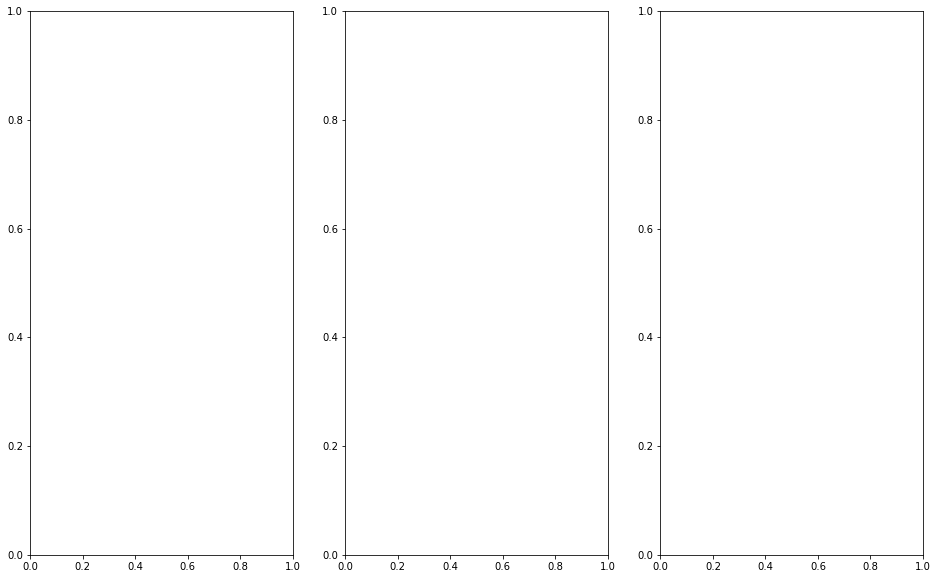

In [9]:
# SALINITY PROFILE YERMARK
warnings.simplefilter("ignore")

fig, axes = plt.subplots(1,3,figsize=(16,10))
sl = [y1_s, y2_s, y3_s]
tl = [y1_t, y2_t, y3_t]
dl = [y1,y2,y3]
for axs, i, b, t, m in zip(axes.flat, range(3),[1535,1209,850],[54,54,19], ['Y1', 'Y2', 'Y3']):
    depth = -dl[i]['DEPTH']
    rho = dens(sl[i],tl[i],depth,i)
    dyp_mr = np.linspace(t,b,len(depth))
    axs.plot(sl[i],dyp_mr, color = 'steelblue', label='Practical salinity')
    ax2 = axs.twiny()
    ax2.plot(rho,dyp_mr, color = 'b', label ='Potential density')
    axs.invert_yaxis()
    axs.set_xlabel('psu', fontsize=14)
    ax2.set_xlabel('kg/m³', fontsize=14)
    axs.legend(frameon=False, fontsize=12, loc="lower left") 
    ax2.legend(frameon=False, fontsize=12, loc="lower right") 
    axs.text(0.50, 0.98, f'{m}', color='k', fontsize=14, transform=axs.transAxes, verticalalignment='top')  

fig.tight_layout()

plt.savefig('haloclin_dens_yermark.pdf', dpi = 300)

In [ ]:
#SALINITY PROFILES LOFOTEN 
warnings.simplefilter("ignore")

fig, axes = plt.subplots(1,3,figsize=(16,10))
axes[0].set_ylabel('Depth [m]', fontsize=14)
sl = [MB_s, MW_s, MN_s]
tl = [MB_t, MW_t, MN_t]
dl = [MB,MW,MN]
for axs, i, b, t, m in zip(axes.flat, range(3), [2935,1500,640], [260,200,190], ['MB', 'MW', 'MN']):
    depth = -dl[i]['DEPTH']
    rho = dens(sl[i],tl[i],depth,i)
    dyp_mr = np.linspace(t,b,len(depth))
    axs.plot(sl[i],dyp_mr, color = 'steelblue', label='Practical salinity')
    ax2 = axs.twiny()
    ax2.plot(rho,dyp_mr, color = 'b', label ='Potential density')
    axs.invert_yaxis()
    axs.set_xlabel('psu', fontsize=14)
    ax2.set_xlabel('kg/m³', fontsize=14)
    axs.legend(frameon=False, fontsize=12, loc="lower left") 
    ax2.legend(frameon=False, fontsize=12, loc="lower right") 
    axs.text(0.50, 0.98, f'{m}', color='k', fontsize=14, transform=axs.transAxes, verticalalignment='top')  

    
fig.tight_layout()

plt.savefig('haloclin_dens_lofoten.pdf', dpi = 300)

In [ ]:
# SALINITY PROFILES NORTH OF SVALBARD
warnings.simplefilter("ignore")

sl = [E3_s, W3_s, E2_s, W2_s, E1_s]
tl = [E3_t, W3_t, E2_t, W2_t, E1_t]
dl = [E3,W3,E2,W2,E1]
fig, axes = plt.subplots(1,5,figsize=(18,10))
axes[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i, b, t, m in zip(axes.flat,range(5), [1202,1222,727,706,401],[110,50,60,30,50], ['E3','W3','E2','W2','E1']):
    depth = -dl[i]['DEPTH']
    rho = dens(sl[i],tl[i],depth,i)
    dyp_mr = np.linspace(t,b,len(depth))
    axs.plot(sl[i],dyp_mr, color = 'steelblue', label='Practical salinity')
    ax2 = axs.twiny()
    ax2.plot(rho,dyp_mr, color = 'b', label ='Potential density')
    axs.invert_yaxis()
    axs.set_xlabel('psu', fontsize=14)
    ax2.set_xlabel('kg/m³', fontsize=14)
    axs.legend(frameon=False, fontsize=12, loc="lower left") 
    ax2.legend(frameon=False, fontsize=12, loc="upper right")
    axs.text(0.70, 0.85, f'{m}', color='k', fontsize=14, transform=axs.transAxes, verticalalignment='top')  

    
fig.tight_layout()

plt.savefig('haloclin_dens_Nsvalbard.pdf', dpi = 300)